In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path
from src.processing import preprocessing as pp
from src.modeling import train

ROOT_PATH = Path(os.getcwd()).parents[1]

## Preprocessing settings:

In [3]:
input_path = ROOT_PATH / 'data' / 'raw'
output_base_path = ROOT_PATH / 'data' / 'processed'
train_val_split = 0.8
num_mics = 1
num_data = 10
frame_len = 100
stft_nperseg = 512
stft_noverlap = 0
stft_window = 'hamming'
output_phase = False
predictors_len_segment = None
target_len_segment = None
segment_overlap = None
ov_subsets = ["ov1", "ov2", "ov3"]
no_overlaps = False
fs=32000
n_fft=2048 
hop_length=400 
n_mel_bands=256 
frame_length=2049

In [4]:
output_path = output_base_path / 'subset' / 'logmel_IV_10_2nd_Try'

In [5]:
pp.preprocessing_task2(input_path = input_path,
                       output_path = output_path,
                       train_val_split = train_val_split,
                       num_mics = num_mics,
                       num_data = num_data,
                       frame_len = frame_len,
                       stft_nperseg = stft_nperseg,
                       stft_noverlap = stft_noverlap,
                       stft_window = stft_window,
                       output_phase = output_phase,
                       predictors_len_segment = predictors_len_segment,
                       target_len_segment = target_len_segment,
                       segment_overlap = segment_overlap,
                       ov_subsets = ov_subsets,
                       no_overlaps = no_overlaps,
                       fs=fs, 
                       n_fft=n_fft, 
                       hop_length=hop_length, 
                       n_mel_bands=n_mel_bands, 
                       frame_length=frame_length)

Processing L3DAS_Task2_train folder...
Processing L3DAS_Task2_dev folder...
Saving files
Matrices successfully saved
Training set shape:  (8, 7, 256, 4800) (8, 600, 168)
Validation set shape:  (2, 7, 256, 4800) (2, 600, 168)
Test set shape:  (10, 7, 256, 4800) (10, 600, 168)


## Train Settings:

In [3]:
## Saving/loading parameters

# Folder to write results dicts into
results_path = ROOT_PATH / 'model' / 'RESULTS_logmel_IV_10_2ndTry'
# Folder to write checkpoints into
checkpoint_dir = ROOT_PATH / 'model' / 'RESULTS_logmel_IV_10_2ndTry'
# Reload a previously trained model (whole task model)
load_model = None

## Dataset parameters
training_predictors_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'logmel_IV_10_2nd_Try' / 'task2_predictors_train.pkl'
training_target_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'logmel_IV_10_2nd_Try' / 'task2_target_train.pkl'
validation_predictors_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'logmel_IV_10_2nd_Try' / 'task2_predictors_validation.pkl'
validation_target_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'logmel_IV_10_2nd_Try' / 'task2_target_validation.pkl'
test_predictors_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'logmel_IV_10_2nd_Try' / 'task2_predictors_test.pkl'
test_target_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'logmel_IV_10_2nd_Try' / 'task2_target_test.pkl'

## training parameters
gpu_id = 0
use_cuda = False
early_stopping = True
fixed_seed = False

# Learning rate
lr = 0.00001
batch_size = 3
# Sampling rate
sr = 32000
# Patience for early stopping on validation set
patience = 100

## Model parameters
## The following parameters produce a prediction for each 100-msecs frame
# model's architecture, can be seldnet_vanilla or seldnet_augmented
architecture = 'seldnet_augmented'
# 4/8 for 1/2 mics, multiply x2 if using also phase information
# input_channels = 4
input_channels = 7
# max number of simultaneous sounds of the same class
class_overlaps = 3
time_dim = 3751
freq_dim = 100
output_classes = 14
pool_size = [[8,2],[8,2],[2,2],[1,1]]
# Only for seldnet augmented
cnn_filters = [64,128,256,512]
pool_time = True
rnn_size = 256
n_rnn = 3
fc_size = 1024
dropout_perc = 0.3
# Only for seldnet vanilla
n_cnn_filters = 64
verbose = True
sed_loss_weight = 1.
doa_loss_weight = 5.

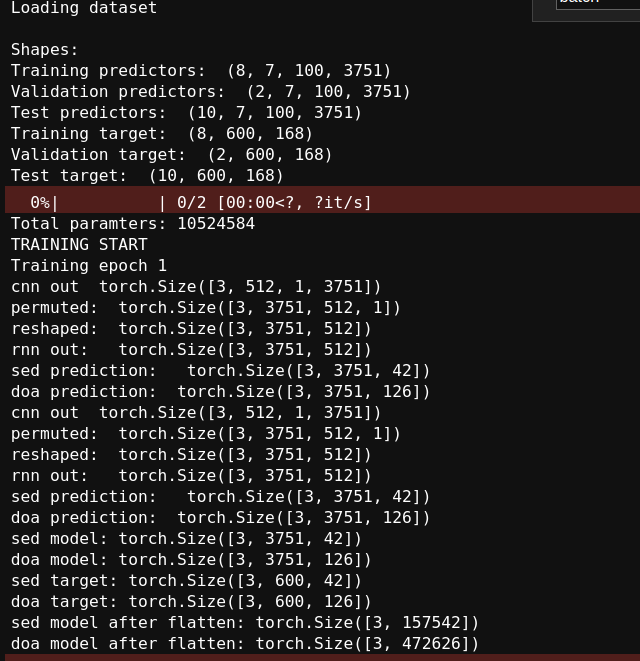

In [4]:
train.main(results_path = results_path,
           checkpoint_dir = checkpoint_dir,
           load_model = load_model,
           training_predictors_path = training_predictors_path,
           training_target_path = training_target_path,
           validation_predictors_path = validation_predictors_path,
           validation_target_path = validation_target_path,
           test_predictors_path = test_predictors_path,
           test_target_path = test_target_path,
           gpu_id = gpu_id,
           use_cuda = use_cuda,
           early_stopping = early_stopping,
           fixed_seed = fixed_seed,
           lr = lr,
           batch_size = batch_size,
           sr = sr,
           patience = patience,
           architecture = architecture,
           input_channels = input_channels,
           class_overlaps = class_overlaps,
           time_dim = time_dim,
           freq_dim = freq_dim,
           output_classes = output_classes,
           pool_size = pool_size,
           cnn_filters = cnn_filters,
           pool_time = pool_time,
           rnn_size = rnn_size,
           n_rnn = n_rnn,
           fc_size = fc_size,
           dropout_perc = dropout_perc,
           n_cnn_filters = n_cnn_filters,
           verbose = verbose,
           sed_loss_weight = sed_loss_weight,
           doa_loss_weight = doa_loss_weight,)


Loading dataset

Shapes:
Training predictors:  (8, 7, 256, 4800)
Validation predictors:  (2, 7, 256, 4800)
Test predictors:  (10, 7, 256, 4800)
Training target:  (8, 600, 168)
Validation target:  (2, 600, 168)
Test target:  (10, 600, 168)


  0%|          | 0/2 [00:00<?, ?it/s]

Total paramters: 11311016
TRAINING START
Training epoch 1
cnn out  torch.Size([3, 512, 2, 600])
permuted:  torch.Size([3, 600, 512, 2])
reshaped:  torch.Size([3, 600, 1024])
rnn out:   torch.Size([3, 600, 512])
sed prediction:   torch.Size([3, 600, 42])
doa prediction:  torch.Size([3, 600, 126])
cnn out  torch.Size([3, 512, 2, 600])
permuted:  torch.Size([3, 600, 512, 2])
reshaped:  torch.Size([3, 600, 1024])
rnn out:   torch.Size([3, 600, 512])
sed prediction:   torch.Size([3, 600, 42])
doa prediction:  torch.Size([3, 600, 126])
sed model: torch.Size([3, 600, 42])
doa model: torch.Size([3, 600, 126])
sed target: torch.Size([3, 600, 42])
doa target: torch.Size([3, 600, 126])
sed model after flatten: torch.Size([3, 25200])
doa model after flatten: torch.Size([3, 75600])


 50%|█████     | 1/2 [05:01<05:01, 301.04s/it]

cnn out  torch.Size([3, 512, 2, 600])
permuted:  torch.Size([3, 600, 512, 2])
reshaped:  torch.Size([3, 600, 1024])
rnn out:   torch.Size([3, 600, 512])
sed prediction:   torch.Size([3, 600, 42])
doa prediction:  torch.Size([3, 600, 126])


KeyboardInterrupt: 

```python
nn.GRU(input_size=1024,
       hidden_size=rnn_size, 
       num_layers=n_rnn, 
       batch_first=True,
       bidirectional=True, 
       dropout=dropout_perc)
```

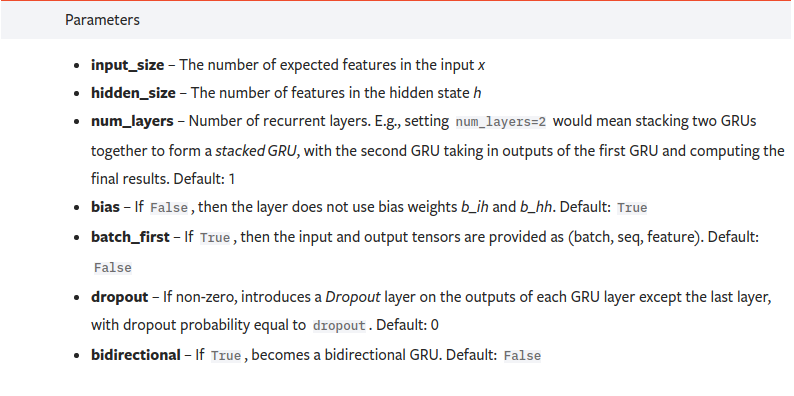

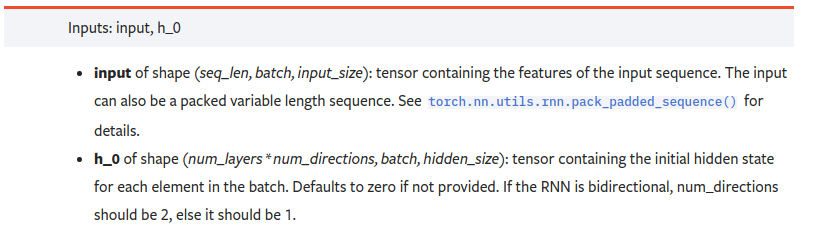

In [ ]:
reshaped:  torch.Size([3, 468, 512])

In [ ]:
## Saving/loading parameters

# Folder to write results dicts into
results_path = ROOT_PATH / 'model' / 'RESULTS_logmel_IV_10'
# Folder to write checkpoints into
checkpoint_dir = ROOT_PATH / 'model' / 'RESULTS_logmel_IV_10'
# Reload a previously trained model (whole task model)
load_model = None

## Dataset parameters
training_predictors_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'STFT_10' / 'task2_predictors_train.pkl'
training_target_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'STFT_10' / 'task2_target_train.pkl'
validation_predictors_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'STFT_10' / 'task2_predictors_validation.pkl'
validation_target_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'STFT_10' / 'task2_target_validation.pkl'
test_predictors_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'STFT_10' / 'task2_predictors_test.pkl'
test_target_path = ROOT_PATH / 'data' / 'processed' / 'subset' / 'STFT_10' / 'task2_target_test.pkl'

## training parameters
gpu_id = 0
use_cuda = False
early_stopping = True
fixed_seed = False

# Learning rate
lr = 0.00001
batch_size = 3
# Sampling rate
sr = 32000
# Patience for early stopping on validation set
patience = 100

## Model parameters
## The following parameters produce a prediction for each 100-msecs frame
# model's architecture, can be seldnet_vanilla or seldnet_augmented
architecture = 'seldnet_augmented'
# 4/8 for 1/2 mics, multiply x2 if using also phase information
input_channels = 4
# input_channels = 7
# max number of simultaneous sounds of the same class
class_overlaps = 3
time_dim = 4800
freq_dim = 256
output_classes = 14
pool_size = [[8,2],[8,2],[2,2],[1,1]]
# Only for seldnet augmented
cnn_filters = [64,128,256,512]
pool_time = True
rnn_size = 256
n_rnn = 3
fc_size = 1024
dropout_perc = 0.3
# Only for seldnet vanilla
n_cnn_filters = 64
verbose = True
sed_loss_weight = 1.
doa_loss_weight = 5.


train.main(results_path = results_path,
           checkpoint_dir = checkpoint_dir,
           load_model = load_model,
           training_predictors_path = training_predictors_path,
           training_target_path = training_target_path,
           validation_predictors_path = validation_predictors_path,
           validation_target_path = validation_target_path,
           test_predictors_path = test_predictors_path,
           test_target_path = test_target_path,
           gpu_id = gpu_id,
           use_cuda = use_cuda,
           early_stopping = early_stopping,
           fixed_seed = fixed_seed,
           lr = lr,
           batch_size = batch_size,
           sr = sr,
           patience = patience,
           architecture = architecture,
           input_channels = input_channels,
           class_overlaps = class_overlaps,
           time_dim = time_dim,
           freq_dim = freq_dim,
           output_classes = output_classes,
           pool_size = pool_size,
           cnn_filters = cnn_filters,
           pool_time = pool_time,
           rnn_size = rnn_size,
           n_rnn = n_rnn,
           fc_size = fc_size,
           dropout_perc = dropout_perc,
           n_cnn_filters = n_cnn_filters,
           verbose = verbose,
           sed_loss_weight = sed_loss_weight,
           doa_loss_weight = doa_loss_weight,)


Loading dataset

Shapes:
Training predictors:  (8, 4, 256, 4800)
Validation predictors:  (2, 4, 256, 4800)
Test predictors:  (10, 4, 256, 4800)
Training target:  (8, 600, 168)
Validation target:  (2, 600, 168)
Test target:  (10, 600, 168)


  0%|          | 0/2 [00:00<?, ?it/s]

Total paramters: 11309288
TRAINING START
Training epoch 1
cnn out  torch.Size([3, 512, 2, 600])
permuted:  torch.Size([3, 600, 512, 2])
reshaped:  torch.Size([3, 600, 1024])
rnn out:   torch.Size([3, 600, 512])
sed prediction:   torch.Size([3, 600, 42])
doa prediction:  torch.Size([3, 600, 126])
cnn out  torch.Size([3, 512, 2, 600])
permuted:  torch.Size([3, 600, 512, 2])
reshaped:  torch.Size([3, 600, 1024])
rnn out:   torch.Size([3, 600, 512])
sed prediction:   torch.Size([3, 600, 42])
doa prediction:  torch.Size([3, 600, 126])
sed model: torch.Size([3, 600, 42])
doa model: torch.Size([3, 600, 126])
sed target: torch.Size([3, 600, 42])
doa target: torch.Size([3, 600, 126])
sed model after flatten: torch.Size([3, 25200])
doa model after flatten: torch.Size([3, 75600])


KeyboardInterrupt: 

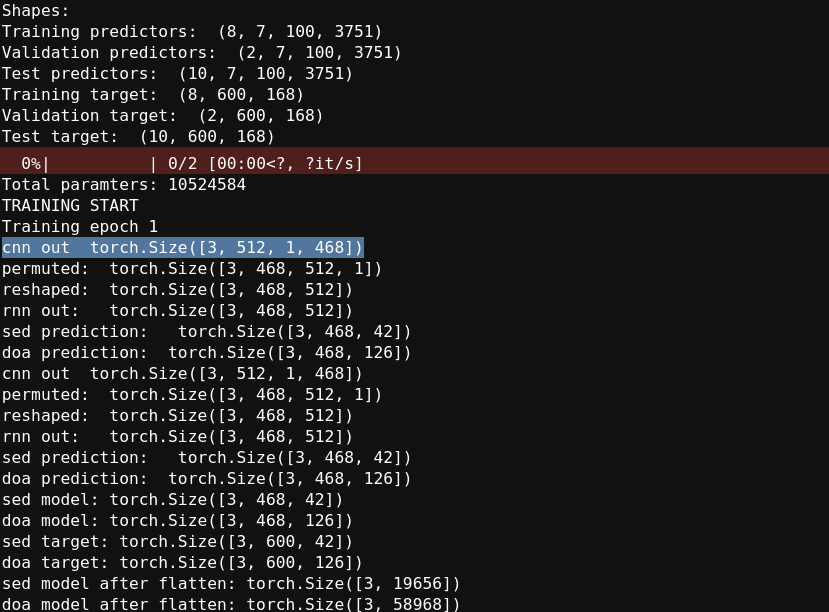

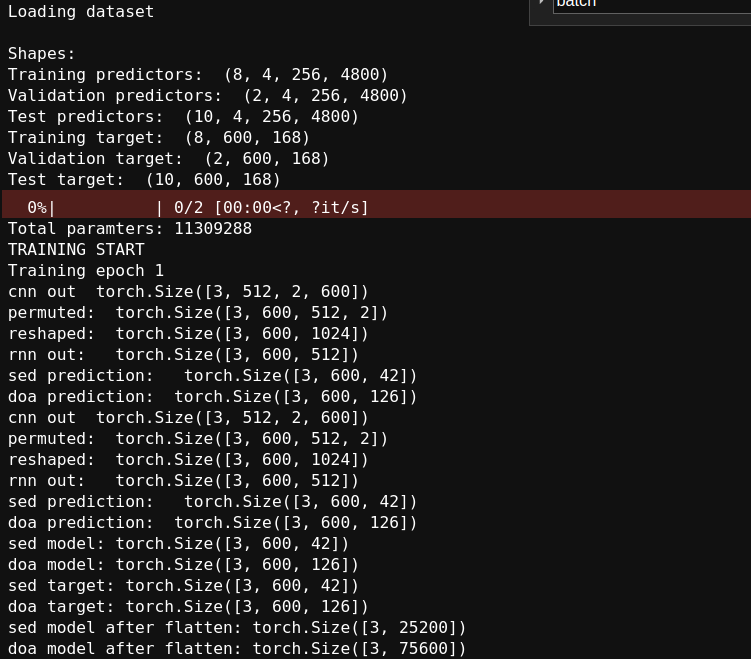

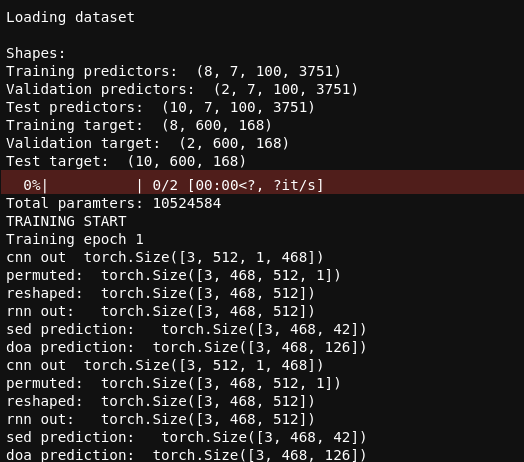

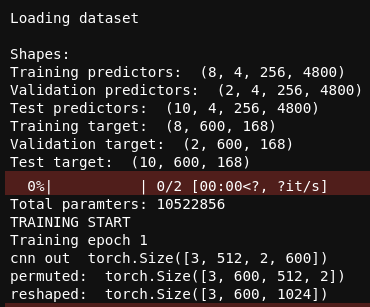

In [1]:
from src.utils.models import Seldnet_augmented

In [ ]:
model = Seldnet_augmented(1000)